In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import IPython.display

In [22]:
def freq_croisement_fft(file,plot_figure):
    fe, data = scipy.io.wavfile.read(file)
    length = data.shape[0] / fe
    time = np.linspace(0., length, data.shape[0])
    T=0.04 # durée de stationnarité des signale sonores
    N = round(T*fe)
    t = np.array(range(-N+1,N-1))/fe;

    decalage = 0.01
    ND = round(decalage*fe);

    window = scipy.signal.windows.hann(51,sym=True)
    data_win = scipy.signal.convolve(data,window,mode='same')
    data_fft = scipy.fft.fft(data_win)
    data_fft = scipy.fft.fftshift(np.abs(data_fft))
    peaks, _ = scipy.signal.find_peaks(data_fft)
    peaks_dec = sorted(data_fft[peaks])[::-1]
    freq = np.linspace(-fe/2,fe/2,len(data_fft))
    
    f1 = max(freq[np.argwhere(data_fft==peaks_dec[0])]).flatten()[0]
    f2 = max(freq[np.argwhere(data_fft==peaks_dec[2])]).flatten()[0]
    
    if plot_figure:
        
        plt.plot(time, data)
        plt.title("Signal {}".format(file.split('.')[0]))
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.show()

    
        plt.title(file.split('.')[0] +" " +r"$f_{01} = $"+"{:.1f} Hz; ".format(f1)+r"$f_{02} = $"+"{:.1f} Hz".format(f2))
        plt.plot(freq, data_fft)
    
        plt.show()
    
    nb_trames = round(data.shape[0]/ND)
    
    return nb_trames,f1,f2

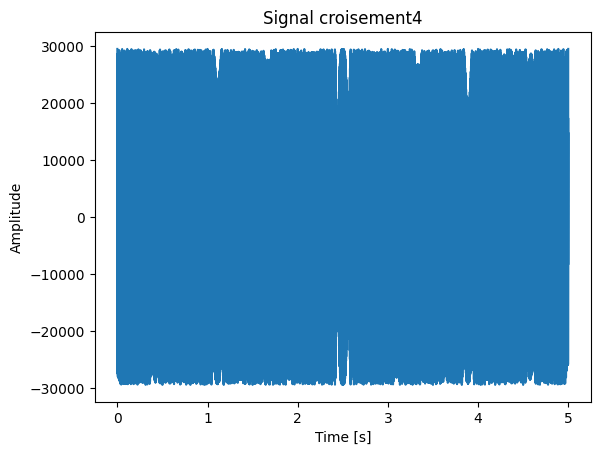

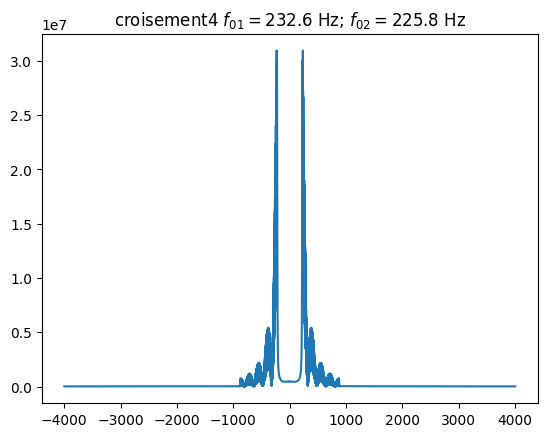

(500, 232.60000000000036, 225.80000000000018)

In [26]:
# freq_croisement_fft('croisement.wav',True)
# freq_croisement_fft('croisement2.wav',True)
# freq_croisement_fft('croisement3.wav',True)
freq_croisement_fft('croisement4.wav',True)

In [31]:
def calcul_freq_fft(file,indice_tram,plot_figure):
    fe, data = scipy.io.wavfile.read(file)
    length = data.shape[0] / fe
    time = np.linspace(0., length, data.shape[0])

    T=0.04 # durée de stationnarité des signale sonores
    N = round(T*fe)
    t = np.array(range(-N+1,N-1))/fe;

    decalage = 0.01
    ND = round(decalage*fe);

    x = data[1+int(indice_tram)*ND:N+int(indice_tram)*ND]
    X = scipy.fft.fft(x)
    X = scipy.fft.fftshift(np.abs(X))
    peaks, _ = scipy.signal.find_peaks(X)
    freq = np.linspace(-fe/2,fe/2,len(X))
    
    peaks_dec = sorted(X[peaks])[::-1]
    freq = np.linspace(-fe/2,fe/2,len(X))
    t = time[1+int(indice_tram)*ND:N+int(indice_tram)*ND]
    if plot_figure:
        plt.plot(t, x)
        plt.title("Trame {}".format(int(indice_tram)))
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.show()
        
        plt.title(f"FFT {file.split('.')[0]} : Trame {indice_tram}")
        plt.plot(freq, X)
        plt.show()
    try:
        f1 = max(freq[np.argwhere(X==peaks_dec[0])]).flatten()[0]
        f2 = max(freq[np.argwhere(X==peaks_dec[2])]).flatten()[0]
        return f1,f2
    except:
        f = max(freq[np.argwhere(X==peaks_dec[0])]).flatten()[0]
        return f,None
  
    
    

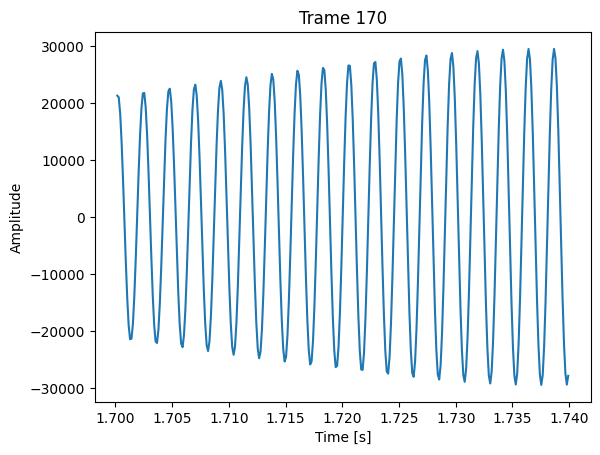

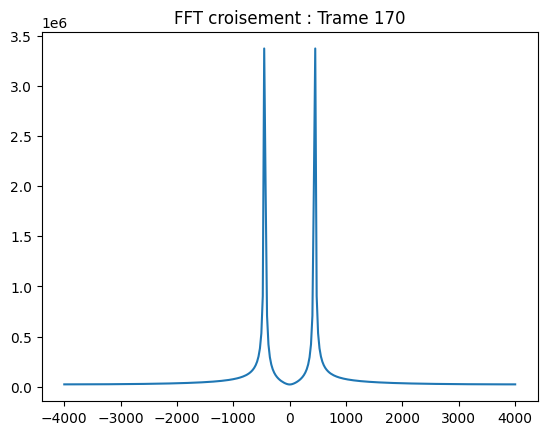

(452.8301886792451, None)

In [32]:
calcul_freq_fft('croisement.wav',170,True)

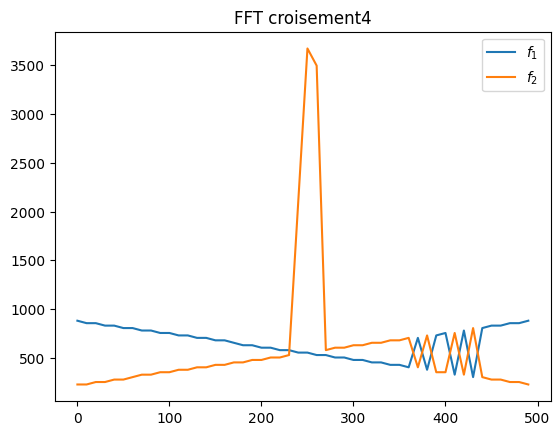

In [40]:
def trace_freq_fft(file):
    nb_trames, bonne_f1, bonne_f2 = freq_croisement_fft(file,False)
    F1, F2 = [], []
    F = []
    tram = [i for i in range(0,nb_trames,10)]
    bonne_tram = []

    for indice_tram in tram:
        f1,f2 = calcul_freq_fft(file,indice_tram,False)
    
        F.append([indice_tram,f1,f2])
    
    seuil = 50
    for i,f1,f2 in F:
        if f2 is None:
            F1.append(np.array([i,f1]))
        else:
            F1.append(np.array([i,f1]))
            F2.append(np.array([i,f2]))
    
    F1 = np.array(F1)
    F2 = np.array(F2)
    plt.plot(F1[:,0],F1[:,1],label='$f_1$')
    plt.plot(F2[:,0],F2[:,1],label='$f_2$')
    plt.title('FFT {}'.format(file.split('.')[0]))
    plt.legend()
    # plt.show()  

trace_freq_fft('croisement4.wav')

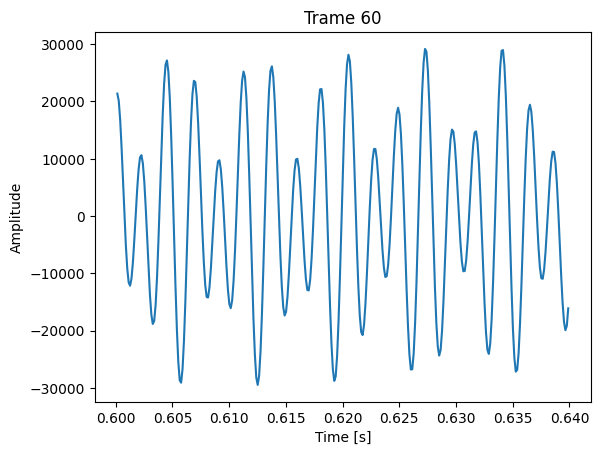

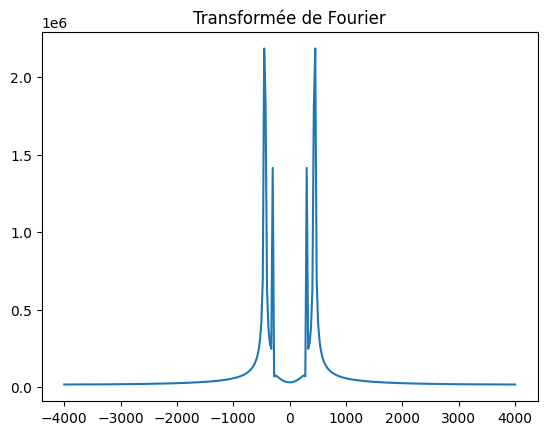

(452.8301886792451, 301.8867924528304)

In [8]:
calcul_freq_fft('croisement.wav',60,True)
# freq_croisement('croisement.wav',True)

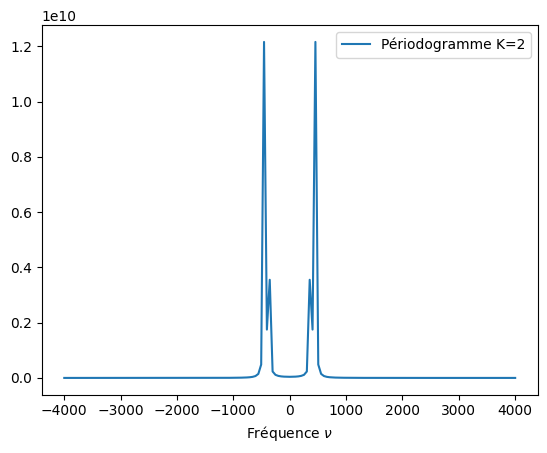

(455.6962025316452, 354.43037974683557)

In [9]:
def calcul_freq_bartlett(file, K,indice_tram,plot_figure):
    fe, data = scipy.io.wavfile.read(file)
    length = data.shape[0] / fe
    time = np.linspace(0., length, data.shape[0])
    T=0.04 # durée de stationnarité des signale sonores
    N = round(T*fe)
    t = np.array(range(-N+1,N-1))/fe;

    decalage = 0.01
    ND = round(decalage*fe);

    x = data[1+int(indice_tram)*ND:N+int(indice_tram)*ND]
       
    L = x.shape[0]
    Lk = L//K
    xk = np.reshape(x[:(K*Lk)], [K, Lk])
    
    DSP = 1/(Lk * K) * np.sum(np.abs(scipy.fft.fft(xk))**2, axis=0)
    DSP = scipy.fft.fftshift(DSP)

    freq = np.linspace(-fe/2,fe/2,len(DSP))
    if plot_figure:
        plt.plot(freq, DSP, label=f'Périodogramme K={K}')
        plt.xlabel(r"Fréquence $\nu$")

        plt.legend()
        plt.show()
    peaks, _ = scipy.signal.find_peaks(DSP)
    peaks_dec = sorted(DSP[peaks])[::-1]
    # freq = np.linspace(-fe/2,fe/2,len(DSP_fft))
    try:
        f1 = max(freq[np.argwhere(DSP==peaks_dec[0])]).flatten()[0]
        f2 = max(freq[np.argwhere(DSP==peaks_dec[2])]).flatten()[0]
        return f1,f2
    except:
        return max(freq[np.argwhere(DSP==peaks_dec[0])]).flatten()[0],None
    

calcul_freq_bartlett('croisement2.wav',2,160,True)

In [41]:
def trace_freq_bartlett(file,K=2):
    F1, F2 = [], []
    F = []
    tram = [i for i in range(0,500,20)]
    bonne_tram = []

    for indice_tram in tram:
        f1,f2 = calcul_freq_bartlett(file,K,indice_tram,False)
        F.append([indice_tram,f1,f2])
    
    for i,f1,f2 in F:
        if f2 is None:
            F1.append(np.array([i,f1]))
        else:
            F1.append(np.array([i,f1]))
            F2.append(np.array([i,f2]))
    
    F1 = np.array(F1)
    F2 = np.array(F2)
    plt.plot(F1[:,0],F1[:,1],label='$f_1$')
    plt.plot(F2[:,0],F2[:,1],label='$f_2$')
    plt.title("Périodogramme de Bartlett pour {}".format(file.split('.')[0]))
    plt.legend()
    plt.show()  

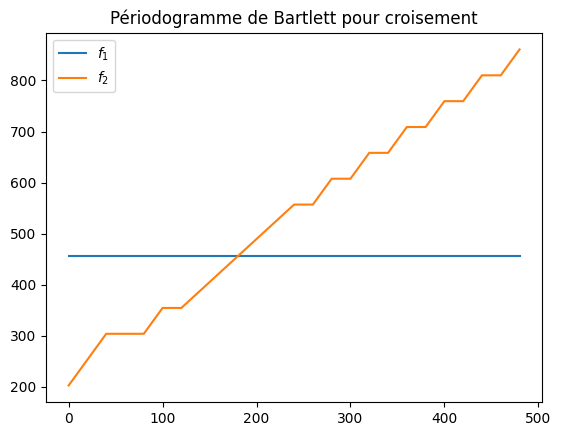

In [42]:
trace_freq_bartlett('croisement.wav')

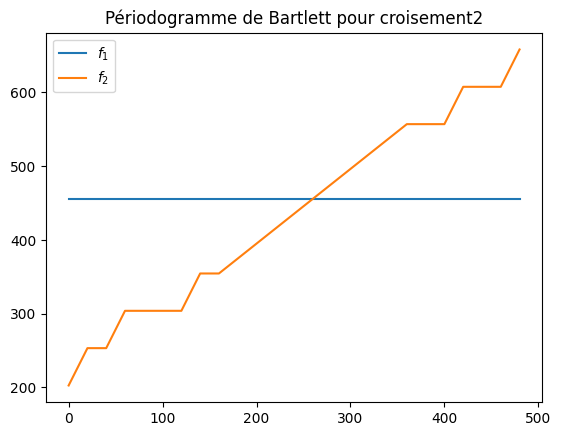

In [43]:
trace_freq_bartlett('croisement2.wav')

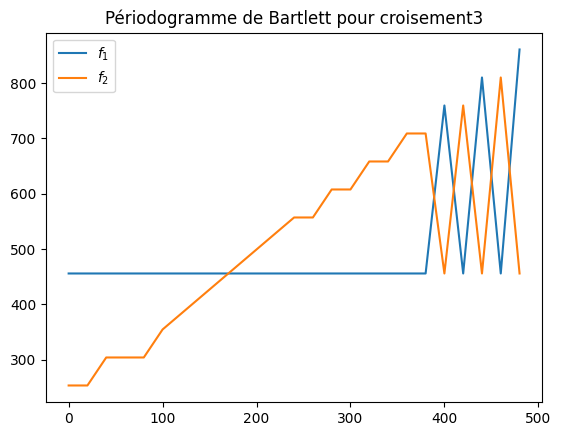

In [49]:
trace_freq_bartlett('croisement3.wav')

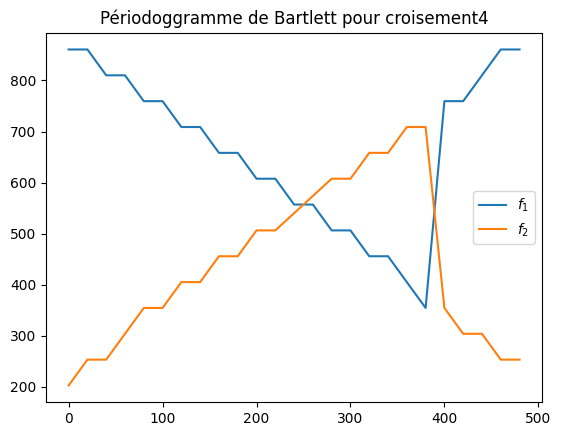

In [14]:
trace_freq_bartlett('croisement4.wav',K=2)

In [15]:
# calcul_freq_bartlett('croisement3.wav',2,300,True)
fe, data = scipy.io.wavfile.read('croisement3.wav')
length = data.shape[0] / fe
time = np.linspace(0., length, data.shape[0])
T=0.04 # durée de stationnarité des signale sonores
N = round(T*fe)
t = np.array(range(-N+1,N-1))/fe;
decalage = 0.01
ND = round(decalage*fe)
indice_tram= 300

x = data[1+int(indice_tram)*ND:N+int(indice_tram)*ND]
# plt.plot(scipy.fft.fftshift(abs(scipy.fft.fft(x))))
# calcul_freq_fft('croisement3.wav',300,True)
# plt.plot(data[430*ND:N+430*ND])

       

In [16]:
# trace_freq_bartlett('croisement4.wav')